# Import Libraries


In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Load and Explore Dataset
Load the hotel_bookings.csv dataset and perform initial exploration to understand its structure, including checking dimensions, data types, and summary statistics.

In [2]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('hotel_bookings.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

# Check the dimensions of the dataset (rows and columns)
data.shape

# Check the data types of each column
data.dtypes

# Generate summary statistics for numerical columns
data.describe()

# Check for missing values in the dataset
data.isnull().sum()

hotel                                  0
is_canceled                            6
lead_time                              1
arrival_date_year                     79
arrival_date_month                    79
arrival_date_week_number              79
arrival_date_day_of_month             79
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Data Cleaning and Preparation
Clean the dataset by handling missing values, removing duplicates, and converting data types where necessary. Create additional features like total_nights (sum of weekend and weekday stays) and total_guests (sum of adults, children, and babies).

In [3]:
# Drop duplicate rows if any
data.drop_duplicates(inplace=True)

# Handle missing values
# Fill missing values in 'children' and 'babies' columns with 0
data['children'].fillna(0, inplace=True)
data['babies'].fillna(0, inplace=True)

# Drop rows with missing values in critical columns like 'country' and 'agent'
data.dropna(subset=['country', 'agent'], inplace=True)

# Convert data types where necessary
# Convert 'children' and 'babies' columns to integers
data['children'] = data['children'].astype(int)
data['babies'] = data['babies'].astype(int)

# Create additional features
# Calculate total nights (sum of weekend and weekday stays)
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Calculate total guests (sum of adults, children, and babies)
data['total_guests'] = data['adults'] + data['children'] + data['babies']

# Verify the changes
data.info()
data.head()

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_7317/556424994.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(0, inplace=True)
/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_7317/556424994.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

<class 'pandas.core.frame.DataFrame'>
Index: 75111 entries, 3 to 119393
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75111 non-null  object 
 1   is_canceled                     75105 non-null  float64
 2   lead_time                       75111 non-null  float64
 3   arrival_date_year               75049 non-null  float64
 4   arrival_date_month              75049 non-null  object 
 5   arrival_date_week_number        75049 non-null  float64
 6   arrival_date_day_of_month       75049 non-null  float64
 7   stays_in_weekend_nights         75111 non-null  int64  
 8   stays_in_week_nights            75111 non-null  int64  
 9   adults                          75111 non-null  int64  
 10  children                        75111 non-null  int64  
 11  babies                          75111 non-null  int64  
 12  meal                            7511

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_guests
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015,1,1
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015,2,2
7,Resort Hotel,0.0,9.0,2015.0,July,27.0,1.0,0,2,2,...,NaN,0,Transient,103.0,0,1,Check-Out,03/07/2015,2,2
8,Resort Hotel,1.0,85.0,2015.0,July,27.0,1.0,0,3,2,...,NaN,0,Transient,82.0,0,1,Canceled,06/05/2015,3,2
9,Resort Hotel,1.0,75.0,2015.0,July,27.0,1.0,0,3,2,...,NaN,0,Transient,105.5,0,0,Canceled,22/04/2015,3,2


# Define Business Problem


#### Business Problem:
The research will examine how pattern changes among market segments and seasons affect the hotel's potential financial loss through cancellations.

#### Relevance:
Operating revenue and business planning at hotels often experience major disruption because of cancellations. The hotel achieves reduced revenue loss by identifying cancellation patterns which enables them to implement both strategic approaches including overbooking policies and specific cancellation fee systems.

#### Data Selection Rationale:
Our analysis includes important variables like market_segment, arrival_date_month, lead_time, is_canceled, and adr.  Selected attributes reveal key patterns and financial impacts crucial to addressing the business issue.


# Analyze Cancellation Patterns
Analyze cancellation rates by market segment, booking lead time, and seasonality (months). Calculate cancellation percentages and identify trends in the data.

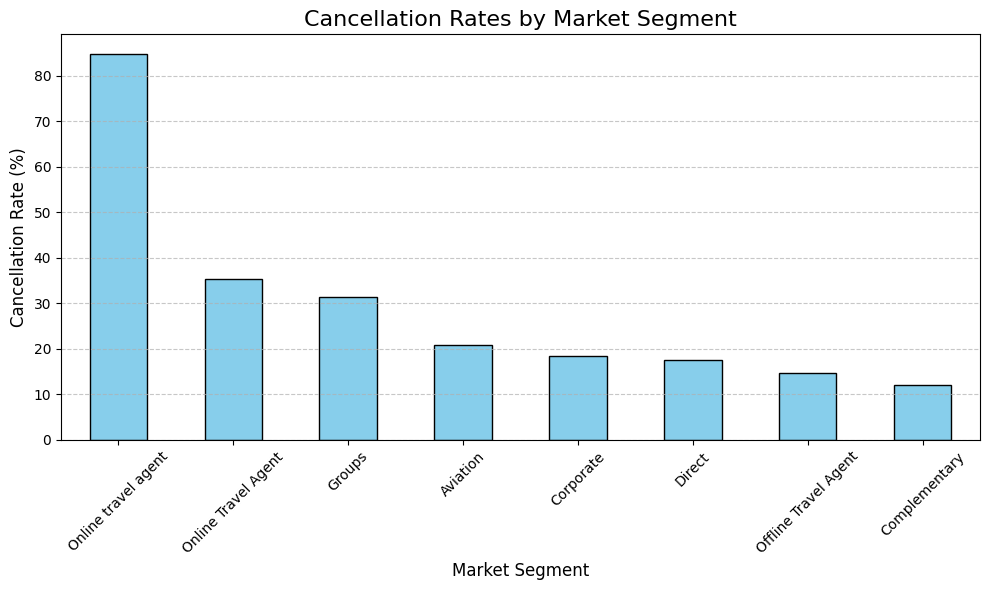

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_7317/381622637.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_by_lead_time = data.groupby('lead_time_bins')['is_canceled'].mean() * 100


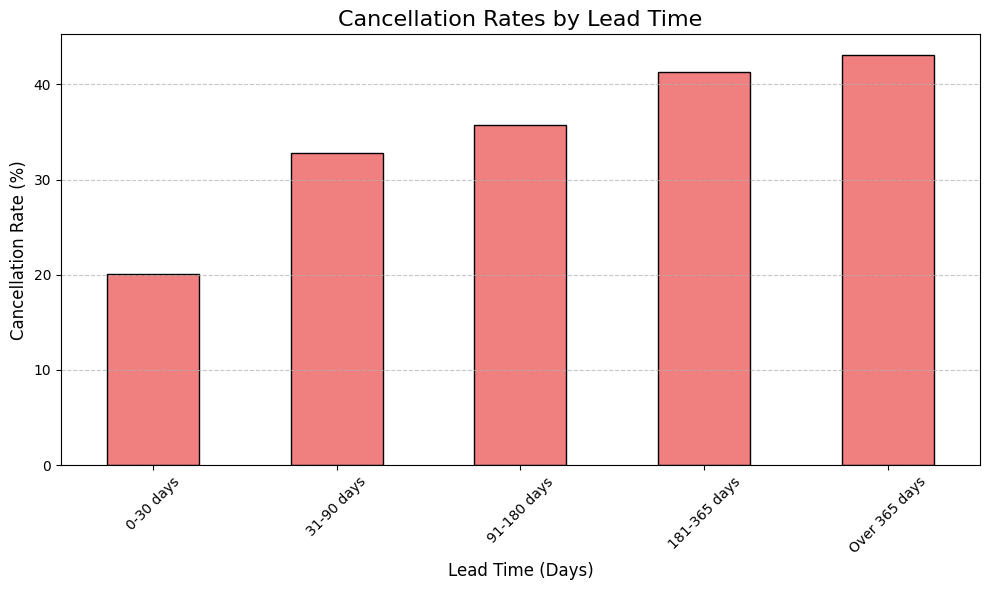

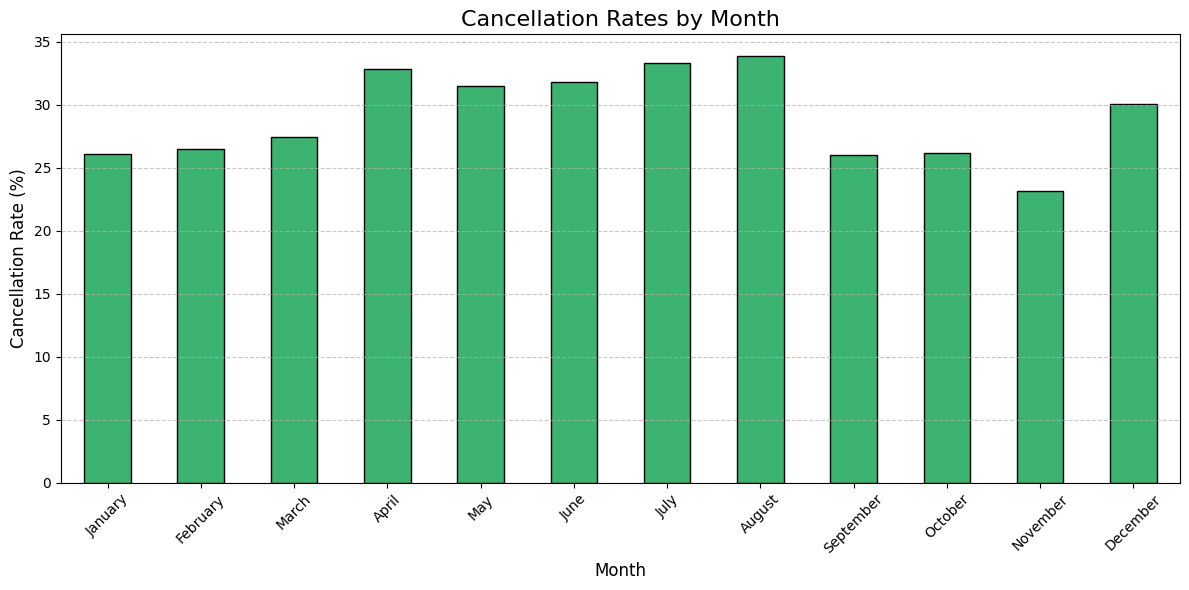

In [4]:
# Analyze cancellation rates by market segment
cancellation_by_segment = data.groupby('market_segment')['is_canceled'].mean() * 100
cancellation_by_segment = cancellation_by_segment.sort_values(ascending=False)

# Plot cancellation rates by market segment
plt.figure(figsize=(10, 6))
cancellation_by_segment.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cancellation Rates by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze cancellation rates by lead time
data['lead_time_bins'] = pd.cut(data['lead_time'], bins=[0, 30, 90, 180, 365, data['lead_time'].max()], 
                                labels=['0-30 days', '31-90 days', '91-180 days', '181-365 days', 'Over 365 days'])
cancellation_by_lead_time = data.groupby('lead_time_bins')['is_canceled'].mean() * 100

# Plot cancellation rates by lead time
plt.figure(figsize=(10, 6))
cancellation_by_lead_time.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Cancellation Rates by Lead Time', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze cancellation rates by month
cancellation_by_month = data.groupby('arrival_date_month')['is_canceled'].mean() * 100
# Ensure months are ordered correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
cancellation_by_month = cancellation_by_month.reindex(month_order)

# Plot cancellation rates by month
plt.figure(figsize=(12, 6))
cancellation_by_month.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Cancellation Rates by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Examine Revenue Impact
Calculate the potential revenue impact of cancellations using the ADR (average daily rate) and planned length of stay. Create aggregations to quantify revenue loss by segment and time period.

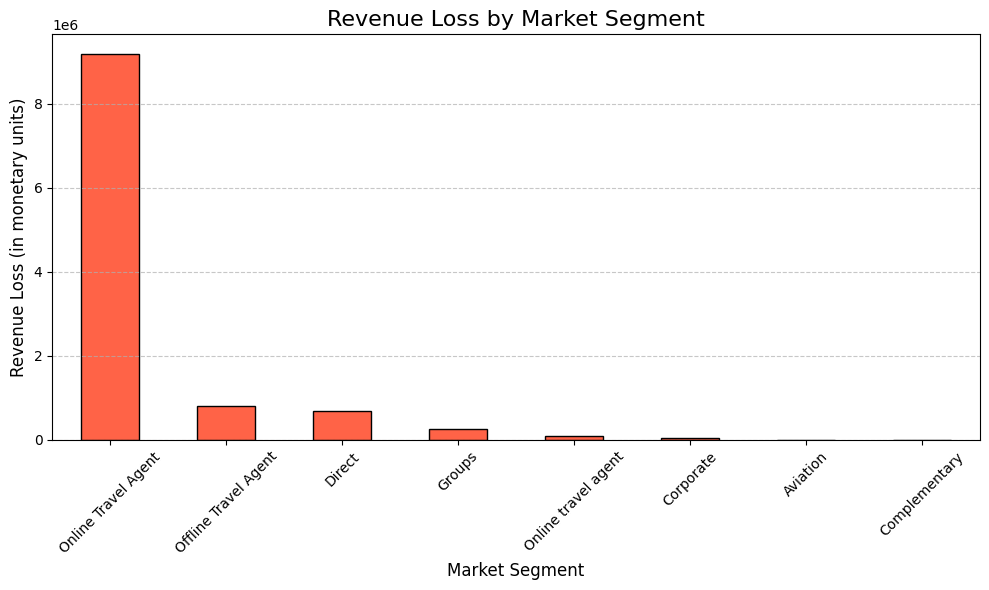

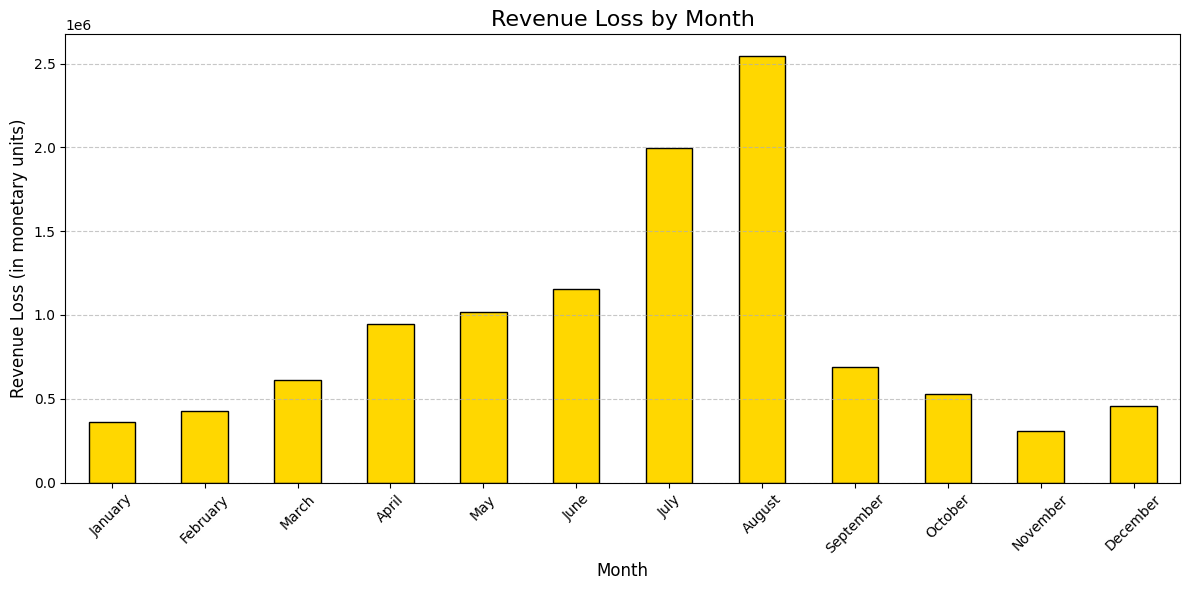

In [5]:
# Calculate potential revenue impact of cancellations
data['potential_revenue'] = data['adr'] * data['total_nights']  # Calculate potential revenue for each booking
data['revenue_loss'] = data['potential_revenue'] * data['is_canceled']  # Calculate revenue loss for canceled bookings

# Aggregate revenue loss by market segment
revenue_loss_by_segment = data.groupby('market_segment')['revenue_loss'].sum().sort_values(ascending=False)

# Plot revenue loss by market segment
plt.figure(figsize=(10, 6))
revenue_loss_by_segment.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Revenue Loss by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Revenue Loss (in monetary units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Aggregate revenue loss by month
revenue_loss_by_month = data.groupby('arrival_date_month')['revenue_loss'].sum()
revenue_loss_by_month = revenue_loss_by_month.reindex(month_order)  # Ensure months are ordered correctly

# Plot revenue loss by month
plt.figure(figsize=(12, 6))
revenue_loss_by_month.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Revenue Loss by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue Loss (in monetary units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create Visualization


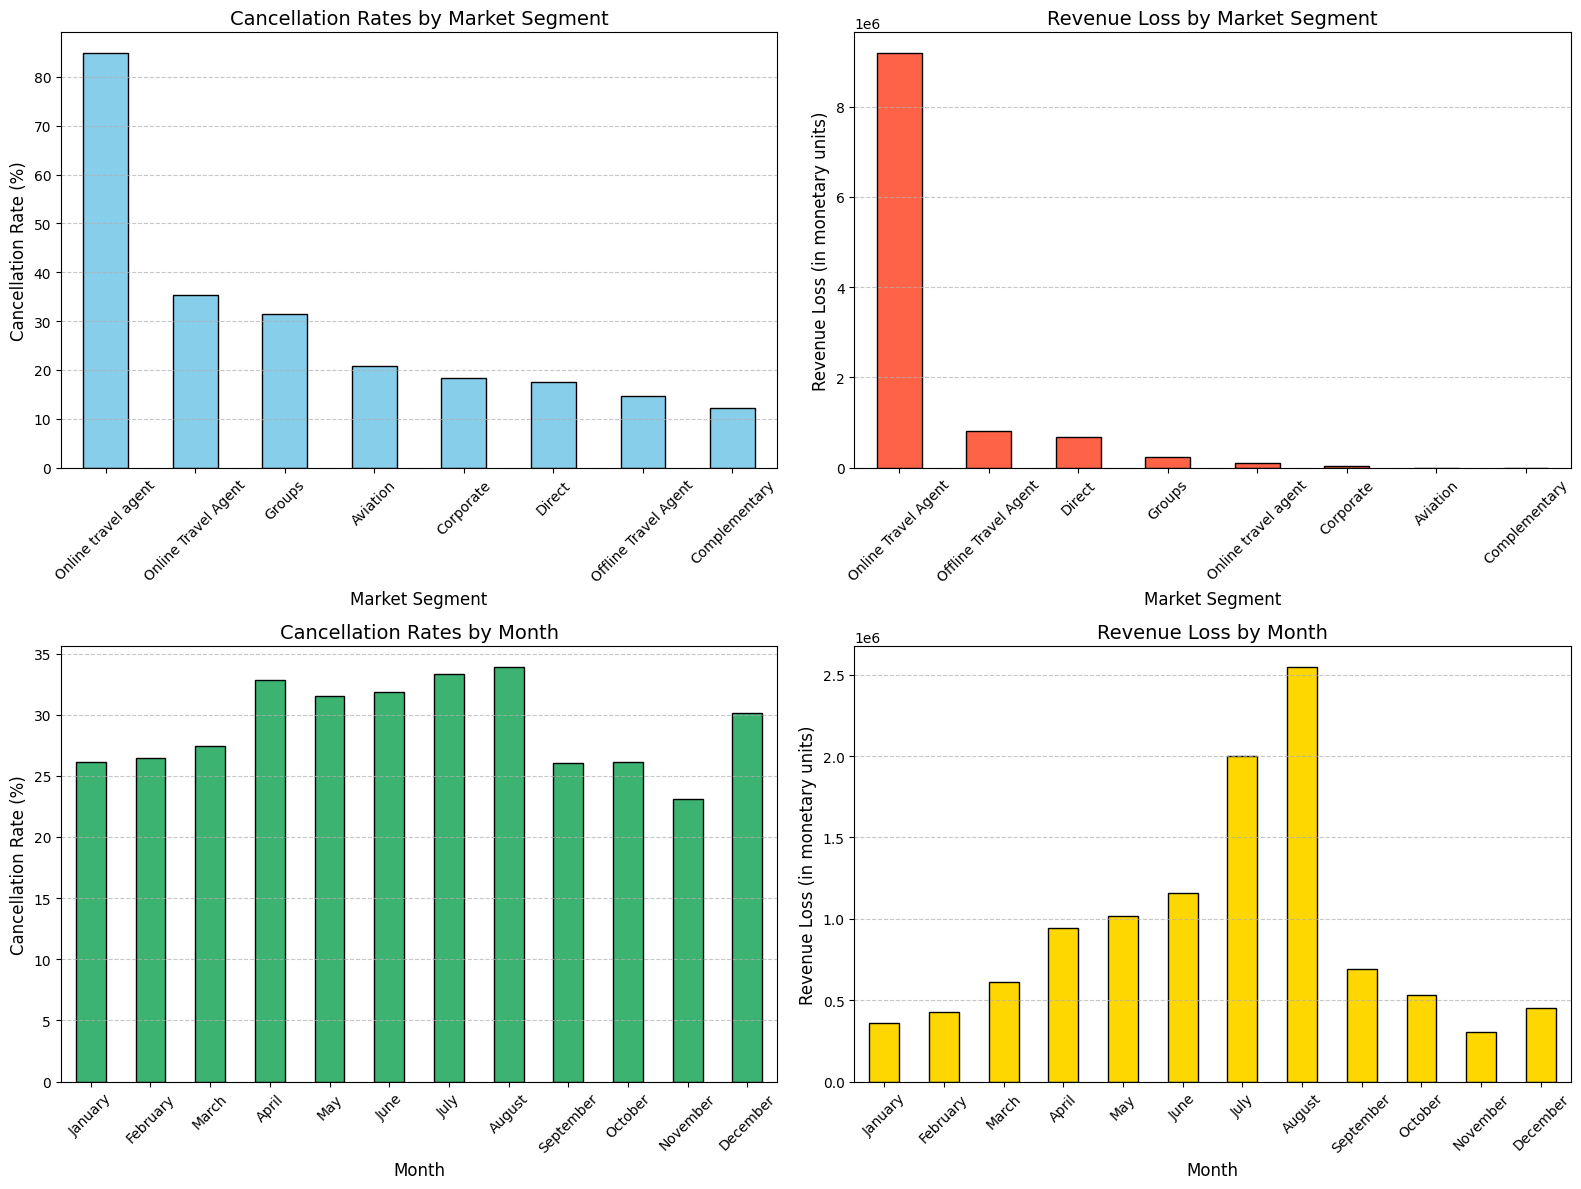

In [6]:
# Create a combined visualization for cancellation rates and revenue impact by market segment and season
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Cancellation Rates by Market Segment
cancellation_by_segment.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Cancellation Rates by Market Segment', fontsize=14)
axes[0, 0].set_xlabel('Market Segment', fontsize=12)
axes[0, 0].set_ylabel('Cancellation Rate (%)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Revenue Loss by Market Segment
revenue_loss_by_segment.plot(kind='bar', color='tomato', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Revenue Loss by Market Segment', fontsize=14)
axes[0, 1].set_xlabel('Market Segment', fontsize=12)
axes[0, 1].set_ylabel('Revenue Loss (in monetary units)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Cancellation Rates by Month
cancellation_by_month.plot(kind='bar', color='mediumseagreen', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Cancellation Rates by Month', fontsize=14)
axes[1, 0].set_xlabel('Month', fontsize=12)
axes[1, 0].set_ylabel('Cancellation Rate (%)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 4: Revenue Loss by Month
revenue_loss_by_month.plot(kind='bar', color='gold', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Revenue Loss by Month', fontsize=14)
axes[1, 1].set_xlabel('Month', fontsize=12)
axes[1, 1].set_ylabel('Revenue Loss (in monetary units)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Mini-Report ( 216 words) 

### Mini-Report

#### Business Problem:
The research will examine how pattern changes among market segments and seasons affect the hotel's potential financial loss through cancellations.

#### Relevance:
Operating revenue and business planning at hotels often experience major disruption because of cancellations. The hotel achieves reduced revenue loss by identifying cancellation patterns which enables them to implement both strategic approaches including overbooking policies and specific cancellation fee systems.

#### Data Selection Rationale:
Our analysis includes important variables like market_segment, arrival_date_month, lead_time, is_canceled, and adr.  Selected attributes reveal key patterns and financial impacts crucial to addressing the business issue.


#### Findings and Insights:
The Online TA and Groups market segments show the highest cancellation rates according to the results which indicates that stronger cancellation policies should be implemented in these market segments. Long lead time bookings tend to be canceled at higher rates than short lead time bookings because of their increased uncertainty. The month of July and August show the highest cancellation rates since they fall during the summer peak period when bookings reach their seasonal peak. Most revenue losses from cancellations arrive in the Online TA segment while Groups segment follows as the second-largest source. The summer period demonstrates the highest revenue loss from canceled bookings. The hotel can implement revenue management improvements alongside operational enhancements through the obtained data analysis findings.